In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
l_r = 0.001

In [40]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [41]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False, num_workers=0)

In [42]:
example = iter(train_loader)
samples, labels= next(example)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


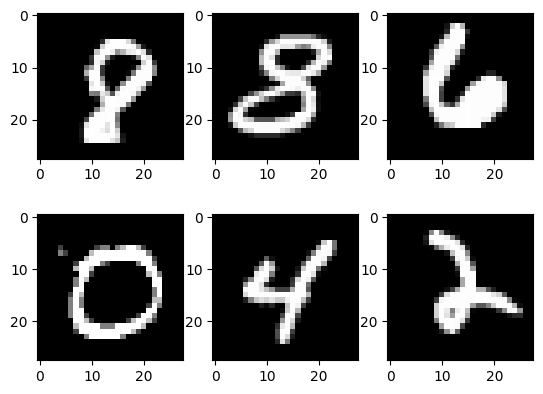

In [43]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()

In [58]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes) -> None:
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out


In [60]:
model = NeuralNet(input_size,hidden_size,num_classes).to(device)

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr =l_r)

In [72]:
n_total_steps = len(train_loader)
for e in range(num_epochs):
    for i , (img, lables) in enumerate(train_loader):
        images = img.reshape(-1, 28*28).to(device)
        lables = lables.to(device)

        op = model(images)
        l = loss(op, lables)

        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {e+1}/{num_epochs}, step {i + 1}/ {n_total_steps}, loss = {l:.4f}')


with torch.no_grad():
    n_c = 0
    n_samples = 0

    for images, lables in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        lables = lables.to(device)
        op = model(images)

        _, pred = torch.max(op,1)

        n_samples+= lables.shape[0]

        n_c+= (pred == lables).sum().item()

    acc = 100 * (n_c / n_samples)

    print(f'accuracy = {acc}')




epoch 1/2, step 100/ 600, loss = 0.0202
epoch 1/2, step 200/ 600, loss = 0.0031
epoch 1/2, step 300/ 600, loss = 0.0139
epoch 1/2, step 400/ 600, loss = 0.0033
epoch 1/2, step 500/ 600, loss = 0.0034
epoch 1/2, step 600/ 600, loss = 0.0007
epoch 2/2, step 100/ 600, loss = 0.0082
epoch 2/2, step 200/ 600, loss = 0.0028
epoch 2/2, step 300/ 600, loss = 0.0052
epoch 2/2, step 400/ 600, loss = 0.0073
epoch 2/2, step 500/ 600, loss = 0.0359
epoch 2/2, step 600/ 600, loss = 0.0059
accuracy = 97.78999999999999
